# Problème des N-corps avec Python
## Imports

In [25]:
import numpy as np
import matplotlib.pyplot as plt

## Constante

In [26]:
C_G=6.67e-11 # en N.m^2.kg^-2

## Définition des conditions initiales

In [30]:
soleil={
    'x':0,
    'y':0,
    'z':0,
    'masse':2e30,
    'rayon':696e6,
    'vitesse': {
        'x': 0,
        'y': 0,
        'z': 0,
    }
}
mercure={
    'x':28e9,
    'y':0,
    'z':0,
    'masse':3.3e23,
    'rayon':2.5e6,
    'vitesse': {
        'x': 0,
        'y': 47e3,
        'z': 0,
    }
}
venus={
    'x':108e9,
    'y':0,
    'z':0,
    'masse':4.8e24,
    'rayon':6e6,
    'vitesse': {
        'x': 0,
        'y': 35e3,
        'z':0,
    }
}
terre={
    'x':150e9,
    'y':0,
    'z':0,
    'masse':6e24,
    'rayon':6.4e6,
    'vitesse': {
        'x': 0,
        'y': 29.8e3,
        'z': 0,
    }
}
mars={
    'x':227e9,
    'y':0,
    'z':0,
    'masse':6.4e23,
    'rayon':3.4e6,
    'vitesse': {
        'x': 0,
        'y': 24e3,
        'z': 0,
    }
}
jupiter={
    'x':778e9,
    'y':0,
    'z':0,
    'masse':1.9e27,
    'rayon':70e6,
    'vitesse': {
        'x':0,
        'y':13e3,
        'z':0,
    }
}
saturne={
    'x':1.4e12,
    'y':0,
    'z':0,
    'masse':568e24,
    'rayon':60e6,
    'vitesse': {
        'x':0,
        'y':9.6e3,
        'z':0,
    }
}
uranus={
    'x':2.9e12,
    'y':0,
    'z':0,
    'masse':8.7e25,
    'rayon':25.6e6,
    'vitesse': {
        'x':0,
        'y':6.8e3,
        'z':0,
    }
}
neptune={
    'x':4.5e12,
    'y':0,
    'z':0,
    'masse':102e24,
    'rayon':24.8e6,
    'vitesse': {
        'x':0,
        'y':5.4e3,
        'z':0,
    }
}

## Définition des fonctions

In [31]:
def cartesian2spheric(x, y, z):
    """Transforme une coordonnée cartésienne en coordonnée sphérique"""
    r=np.sqrt(x**2 + y**2 + z**2)
    if r!=0:
        theta=np.arccos(z/r)
    else:
        theta=0
    if x!=0:
        phi=np.arctan2(y,x)
    else:
        phi=0
    return r, theta, phi
    
def spheric2cartesian(r, theta, phi):
    """Transforme une coordonnée sphérique en coordonnée cartésienne"""
    x=r*np.sin(theta)*np.cos(phi)
    y=r*np.sin(theta)*np.sin(phi)
    z=r*np.cos(theta)
    return x, y, z
    
def calculForce(astre_subissant, astre_influant):
    """Calcul la force exercé par l'astre influant sur l'astre subissant"""
    x=astre_subissant['x']-astre_influant['x']
    y=astre_subissant['y']-astre_influant['y']
    z=astre_subissant['z']-astre_influant['z']
    astre_subissant['r'], astre_subissant['theta'], astre_subissant['phi']=cartesian2spheric(x, y, z)
    force=C_G*(astre_subissant['masse']*astre_influant['masse'])/(astre_subissant['r']**2)
    vecteur_force={
        'r':-force,
        'theta':astre_subissant['theta'],
        'phi':astre_subissant['phi']
    }
    return spheric2cartesian(vecteur_force['r'], vecteur_force['theta'], vecteur_force['phi'])

calculVitesse=lambda force, masse, periode: {
    'x': (force['x']/masse)*periode,
    'y': (force['y']/masse)*periode,
    'z': (force['z']/masse)*periode,
}

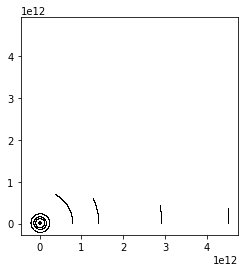

In [32]:
conditions_initiales = [soleil, mercure, venus, terre, mars, jupiter, saturne, uranus, neptune]
nb_corps = len(conditions_initiales) # nombre de corps étudié dans le système
positions_corps = [conditions_initiales]
# mise en place du temps
temps_initial = 0 # s
temps_final = 2*365.25*3600*24 # s
pas_temps = 3600*24 # en d# s

intervalle = temps_final - temps_initial
num_points = int(intervalle / pas_temps) + 1   # nombre d'éléments
temps = np.linspace(temps_initial, temps_final, num_points)

for element in temps : 
    nouvelles_positions = []
    for planete in positions_corps[-1] :
        plt.plot(planete['x'], planete['y'], ',k')
        somme_force_app = {
            'x' : 0,
            'y' : 0,
            'z' : 0,
        }
        for i in range(nb_corps) : 
            if planete != positions_corps[-1][i] :
                force_x, force_y, force_z = calculForce(planete,positions_corps[-1][i])
                somme_force_app['x']+=force_x
                somme_force_app['y']+=force_y
                somme_force_app['z']+=force_z
        vitesse = calculVitesse(somme_force_app, planete['masse'], pas_temps)
        planete['vitesse']['x']+=vitesse['x']
        planete['vitesse']['y']+=vitesse['y']
        planete['vitesse']['z']+=vitesse['z']
        planete['x'] += planete['vitesse']['x']*pas_temps
        planete['y'] += planete['vitesse']['y']*pas_temps
        planete['z'] += planete['vitesse']['z']*pas_temps
        nouvelles_positions.append(planete)
    positions_corps.append(nouvelles_positions)
plt.axis('square')
plt.show()